# Credit Card Fraud

Develop an algorithm to predict fraud. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('./data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
frauds.shape

(492, 31)

In [3]:
frauds_count = df.groupby('Class').count()[df.columns[0]].iloc[1]
okay_count = df.groupby('Class').count()[df.columns[0]].iloc[0]

baseline = 1 - frauds_count / (frauds_count + okay_count)
print('Baseline R-squared:', baseline)

Baseline R-squared: 0.9982725143693799


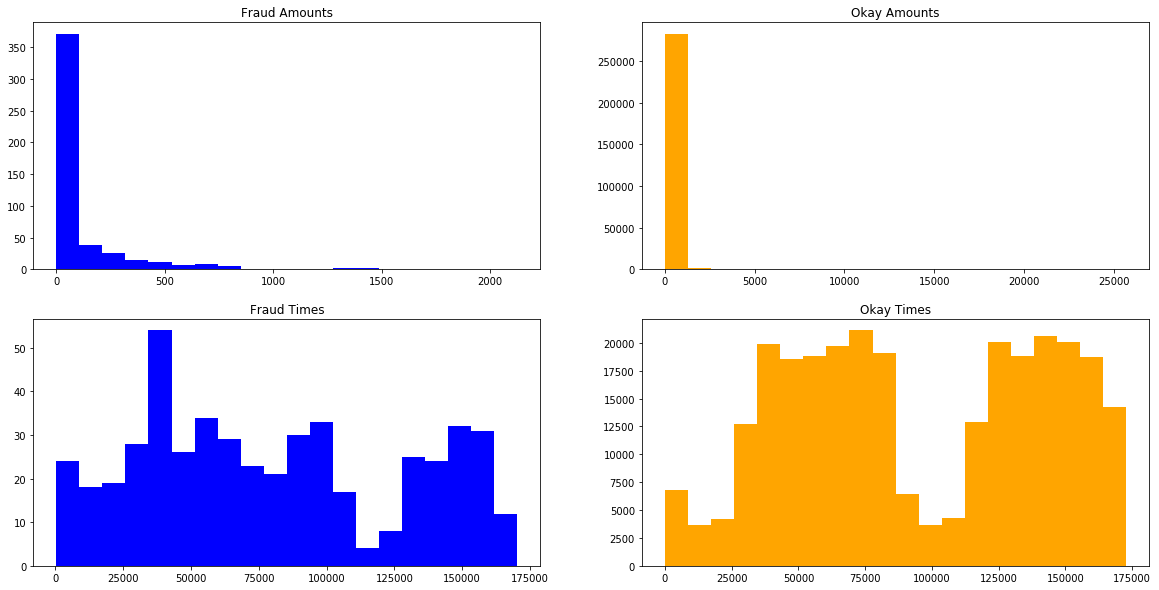

In [4]:
frauds = df[df['Class'] == 1]
okays = df[df['Class'] == 0]

plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.title('Fraud Amounts')
plt.hist(frauds['Amount'], bins=20, label='Fraud', color='blue')

plt.subplot(2, 2, 2)
plt.title('Okay Amounts')
plt.hist(okays['Amount'], bins=20, label='Okay', color='orange')

plt.subplot(2, 2, 3)
plt.title('Fraud Times')
plt.hist(frauds['Time'], bins=20, label='Fraud', color='blue')

plt.subplot(2, 2, 4)
plt.title('Okay Times')
plt.hist(okays['Time'], bins=20, label='Okay', color='orange')

plt.show()

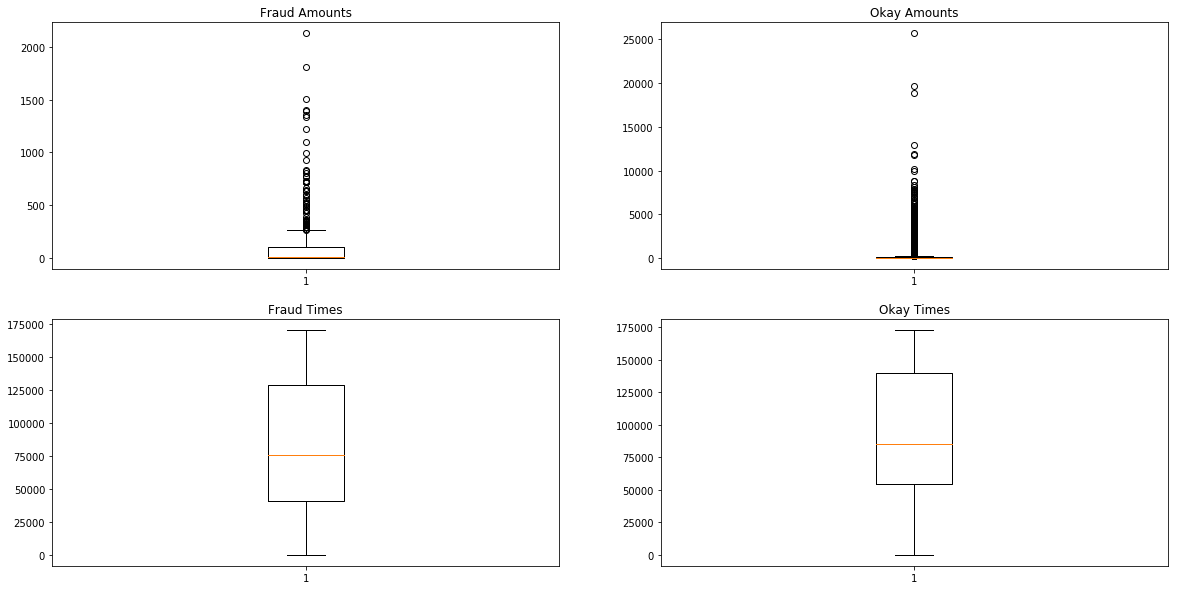

In [13]:
# TODO: 
# Look at outliers – see distribution of remaining amounts?
# Compare model with and without outliers

plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.title('Fraud Amounts')
plt.boxplot(frauds['Amount'])

plt.subplot(2, 2, 2)
plt.title('Okay Amounts')
plt.boxplot(okays['Amount'])

plt.subplot(2, 2, 3)
plt.title('Fraud Times')
plt.boxplot(frauds['Time'])

plt.subplot(2, 2, 4)
plt.title('Okay Times')
plt.boxplot(okays['Time'])

plt.show()

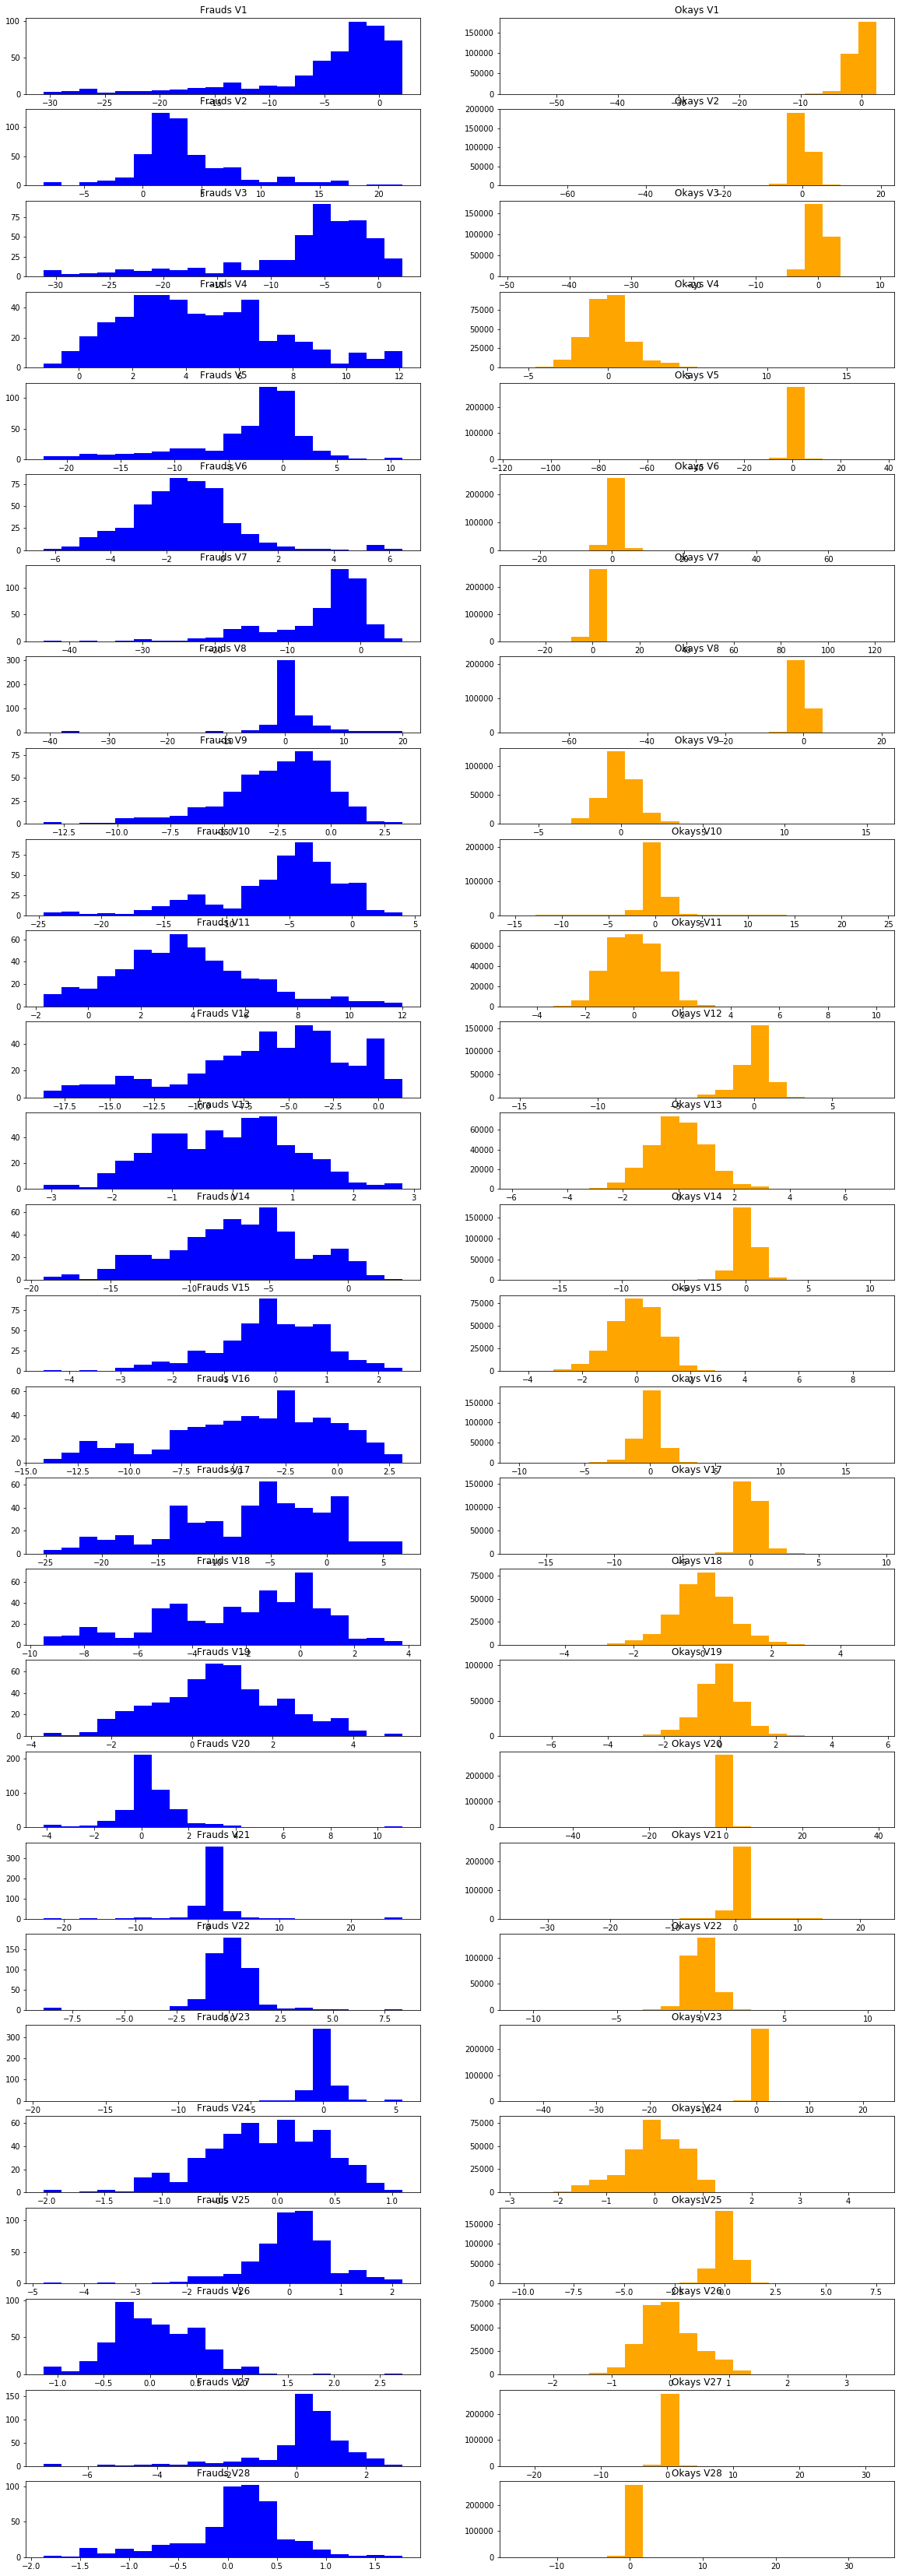

In [6]:
plt.figure(figsize=(20,60))

for i in range(28):
    col_name = 'V' + str(i + 1)
    
    plt.subplot(28, 2, 2 * i + 1)
    plt.title('Frauds ' + col_name)
    plt.hist(frauds[col_name], bins=20, color='blue')
    
    plt.subplot(28, 2, 2 * i + 2)
    plt.title('Okays ' + col_name)
    plt.hist(okays[col_name], bins=20, color='orange')
    
plt.show()

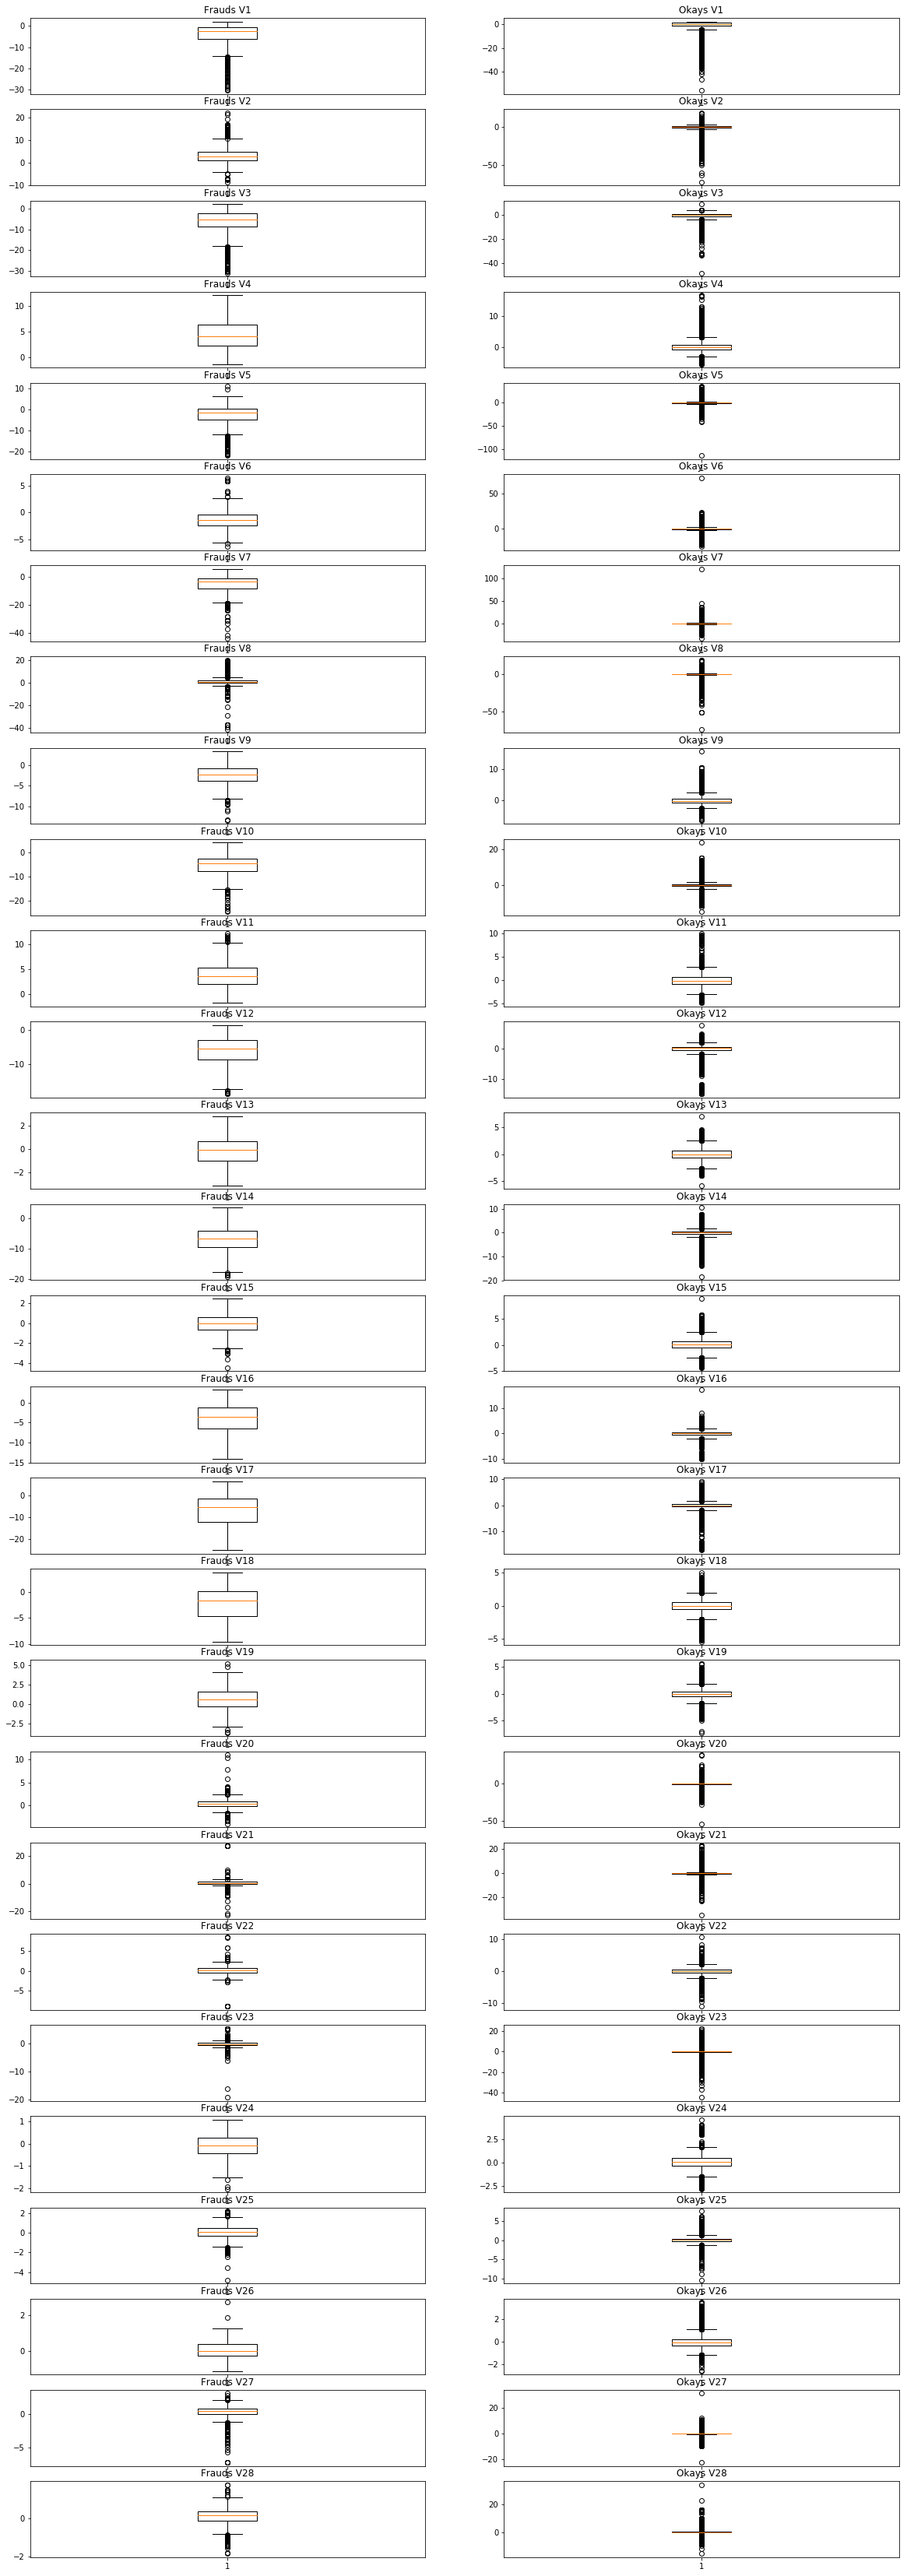

In [7]:
plt.figure(figsize=(20,60))

for i in range(28):
    col_name = 'V' + str(i + 1)
    
    plt.subplot(28, 2, 2 * i + 1)
    plt.title('Frauds ' + col_name)
    plt.boxplot(frauds[col_name])
    
    plt.subplot(28, 2, 2 * i + 2)
    plt.title('Okays ' + col_name)
    plt.boxplot(okays[col_name])
    
plt.show()

In [8]:
num_rows = df.shape[0]
trainsize = int(num_rows / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

# TRAINING
X_train = df_train.loc[:, ~(df_train.columns).isin(['rings'])]
Y_train = df_train['Class'].values.reshape(-1, 1)

# TESTING
X_test = df_test.loc[:, ~(df_train.columns).isin(['rings'])]
Y_test = df_test['Class'].values.reshape(-1, 1)

In [ ]:
# TODO:
# ROC or AUC threshold
# Manually add rule where threshold has to be over 0.9 for it to be considered to be part of the majority class
# GBM

## LASSO Logistic Regression

In [14]:
lasso = linear_model.LogisticRegression(penalty='l1', C=10) 
lassofit = lasso.fit(X_train, Y_train)
lasso_score_training = lasso.score(X_train, Y_train)

print('R²:', lasso_score_training)
print('\nCoefficients:', lassofit.coef_)
print('\nIntercept:', lassofit.intercept_)

print(X_train.columns)

lasso_score_testing = lasso.score(X_test, Y_test)
print('\nR²:', lasso_score_testing)

lasso_improvement_over_baseline = (lasso_score_testing - baseline) / baseline
lasso_improvement_over_baseline

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R²: 1.0

Coefficients: [[-5.18244872e-05  0.00000000e+00 -2.81719085e-02 -1.22919977e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.67982737e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -4.21175961e-02 -2.71465901e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -6.22281325e-04  2.03151922e+01]]

Intercept: [-10.97794868]
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

R²: 1.0


0.0017304750013190106

From this regression's coefficients, it seems like V4, V6, V19, V23, V24, V26, V27, and V28 were the least important features. I am happy with the R² value here, as it is a 0.17% improvement on baseline.

### Evaluating LASSO Logistic Regression

In [12]:
Y_train_vals = df_train['Class'].values
Y_test_vals = df_test['Class'].values

predict_train = lasso.predict(X_train)
predict_test = lasso.predict(X_test)

table_train = pd.crosstab(Y_train_vals, predict_train, margins=True)
table_test = pd.crosstab(Y_test_vals, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training accuracy:\n'
    '% Type I errors: {}\n'
    '% Type II errors: {}\n\n'
    'Test accuracy:\n'
    '% Type I errors: {}\n'
    '% Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training accuracy:
% Type I errors: 0.0
% Type II errors: 0.0

Test accuracy:
% Type I errors: 0.0
% Type II errors: 7.022274655206314e-06


I am looking to minimize Type II errors ("false negative"s – i.e. considering something that is a fraud as okay). My test set gave 0.00007% for Type II errors.

## Ridge Logistic Regression

In [19]:
ridge = linear_model.LogisticRegression(penalty='l2', C=10, fit_intercept=False)
ridgefit = ridge.fit(X_train, Y_train)
ridge_score_training = ridge.score(X_train, Y_train)

print('R² for training:', ridge_score_training)
print('\nCoefficients:', ridgefit.coef_)
print('\nIntercept:', ridgefit.intercept_)

ridge_score_testing = ridge.score(X_test, Y_test)
print('\nR² for testing:', ridge_score_testing)

ridge_improvement_over_baseline = (ridge_score_testing - baseline) / baseline
ridge_improvement_over_baseline

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R² for training: 0.9982865529518339

Coefficients: [[-1.25144710e-04  3.46611193e-01 -9.81732498e-01 -1.38515355e+00
   1.40015351e-01 -5.05707534e-01  1.73108179e-01  1.03484217e+00
  -4.12068147e-01 -5.79420049e-01 -2.91367036e-01 -5.76875925e-01
   1.27175343e-01 -4.19256457e-01 -5.20965306e-01 -7.60864674e-01
  -2.22511689e-01 -4.79110962e-01  1.76886469e-01 -1.76700991e-01
   6.05517431e-01  6.31422810e-01  8.99491136e-01  2.88820566e-01
  -1.68250999e-02 -1.19926049e+00  3.07030705e-01 -4.24677442e-01
   2.48353504e-01 -1.56424745e-02  1.39327379e+00]]

Intercept: 0.0

R² for testing: 0.9986798123648212


0.00040800281444045656

I am less happy with the ridge regression's R² value here, as it is only a 0.04% improvement on baseline.

### Evaluating Ridge Logistic Regression

In [11]:
Y_train_vals = df_train['Class'].values
Y_test_vals = df_test['Class'].values

predict_train = ridge.predict(X_train)
predict_test = ridge.predict(X_test)

table_train = pd.crosstab(Y_train_vals, predict_train, margins=True)
table_test = pd.crosstab(Y_test_vals, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training accuracy:\n'
    '% Type I errors: {}\n'
    '% Type II errors: {}\n\n'
    'Test accuracy:\n'
    '% Type I errors: {}\n'
    '% Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training accuracy:
% Type I errors: 0.0008848128199546358
% Type II errors: 0.0008286342282114843

Test accuracy:
% Type I errors: 8.426729586247578e-05
% Type II errors: 0.0012359203393163113


I am looking to minimize Type II errors ("false negative"s – i.e. considering something that is a fraud as okay). My test set gave 0.12% for Type II errors. My LASSO regression performed much better (0.00007% Type II errors).

In [ ]:
# TODO:
# change threshold probability for logistic regression – it might increase performance (threshold > 0.9)

In [ ]:
# CURRICULUM NOTES:

# There are a few things you can do to deal with class imbalance:

# Just ignore it. If we really only care about the absolute accuracy of the model 
# and our sample is representative of the population we aim to predict, this can be a reasonable strategy. 
# Try to engineer features that strongly identify the minority class and this can turn out ok.

# Change your sampling. If you deliberately oversample the minority class or undersample the majority class, 
# you can create a more balanced training set. This is particularly useful if the goal of your model is 
# to correctly identify the minority class. This can also be done by creating synthetic samples 
# to try to make your data more balanced or weighting samples to balance out your classes. 

# Probability outputs. 
# Although Naive Bayes' probability outputs are generally inaccurate and not to be used, 
# other models will give you a more accurate probability of a certain class. 
# Things like logistic regression or support vector machines (SVM) can be good at this. 
# Instead of just taking the most likely outcome, you can set up a specific cutoff or a more complex rule. 
# In the binary case, it could be going with the minority case if it has a priority greater than some threshold.

# Lastly, you can create cost functions for errors. This effectively quantifies ways in which errors are not equal. 
# You find some functional form to scale the cost of an error up or down. This can mean something like a Type II error 
# being twice as bad as a Type I error, or a hundred times as bad, or however you choose to quantify that relationship. 
# SKLearn's Naive Bayes model does not have an easy built-in way to do this, but it's a good thing to keep in mind.